In [6]:
#!pip3 install matplotlib

In [1]:
'''
    Импорт основных библиотек для анализа данных 
'''
import numpy as np
import pandas as pd
from pandas import read_csv
'''
    Импорт основных библиотек для визуализации данных (построение графиков)
'''
import matplotlib.pyplot as plt 
import seaborn as sns # графики выглядят лучше + некоторые функции доступнее
%matplotlib inline
'''
    Импорт модулей библиотеки scikit-learn
    train_teat_split - Стандартное разделение набора данных на обучающие и тестовые наборы
'''
from sklearn.model_selection import train_test_split
'''
    Из библиотеки scilit-learn импорт модуля логистической регрессии. Определение модуля регрессии
'''
from sklearn.linear_model import LogisticRegression
'''
    ПОСТРОЕНИЕ ROC-КРИВОЙ
'''
import sklearn.metrics as metrics


In [2]:
'''
    Считываем данные из файла типа csv с помощью библиотеки pandas, предназначенной для работы с массивами данных
    Обозначим файл переменной train
'''
train = read_csv("train.csv")

<AxesSubplot:>

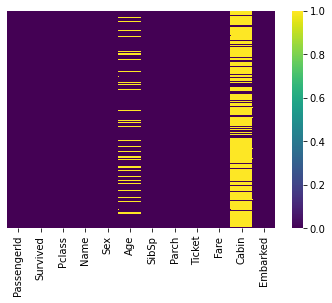

In [3]:
'''
    missing_values - определяем утерянные по какой-либо причине переменные, с помощью функции isnull() 
                     библиотеки pandas [обратная функция - notnull()]
'''
missing_values = train.isnull()
'''
    С помощью библиотеки seaborn для построения графиков отобразим утерянные переменные для каждого столбца в виде тепловой карты heatmap
    data - утерянные переменные, ранее определенные (отображение желтым цветом)
    yticklabels - отображение по y, в нашем случае False
    cbar - отображение тепловой шкалы 
           в нашем случае есть только два значения: 1 - утерянные данные(True), 0 - иначе( False)
    cmap - тип тепловой карты, например "coolwarm" - сине-красное
'''
sns.heatmap(data = missing_values, yticklabels=False, cbar=True, cmap="viridis")

In [4]:
'''
    Было выявлено, что колонка Cabin и Age содержат Null. Решение: убрать 'Cabin', тк эта информация не важна с 
    человеческой точки зрения, для 'Age' проделать необходимые действия
'''
train.drop('Cabin',axis=1,inplace=True)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


ГРУППИРОВКА

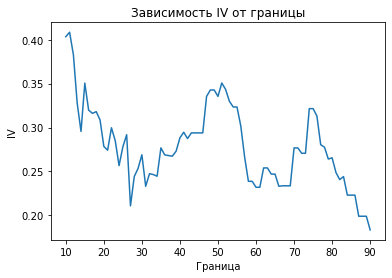

In [6]:
x=[]
y=[]
for i in range(10,91):
    border=i
    woe_1=np.log((train[(train['Fare']<border)&(train['Survived']==1)].shape[0]/train[train['Survived']==1].shape[0]
             )/(train[(train['Fare']<border)&(train['Survived']==0)].shape[0]/train[train['Survived']==0].shape[0]))
    woe_2=np.log((train[(train['Fare']>=border)&(train['Survived']==1)].shape[0]/train[train['Survived']==1].shape[0]
             )/(train[(train['Fare']>=border)&(train['Survived']==0)].shape[0]/train[train['Survived']==0].shape[0]))
    iv_1=(train[(train['Fare']<border)&(train['Survived']==1)].shape[0]/train[train['Survived']==1].shape[0]-train[(train['Fare']<border)&(train['Survived']==0)].shape[0]/train[train['Survived']==0].shape[0])*woe_1
    iv_2=(train[(train['Fare']>=border)&(train['Survived']==1)].shape[0]/train[train['Survived']==1].shape[0]-train[(train['Fare']>=border)&(train['Survived']==0)].shape[0]/train[train['Survived']==0].shape[0])*woe_2
    iv=iv_1+iv_2
    x.append(border)
    y.append(iv)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('Зависимость IV от границы')
plt.xlabel('Граница')
plt.ylabel('IV')
plt.show()

In [10]:
print(train.Fare.max()) #максимальная цена билета
max_fare=train.Fare.max()
print(type(max_fare))
print(train.Age.max()) #максимальный возраст пассажиров

512.3292
<class 'float'>
80.0


In [11]:
#РАБОТА СО СТОЛБЦОМ AGE
'''
    Заполним вектор-столбец 'Age' данными, убирая NULL
'''
def impute_age(cols):
    '''
        Входные данные:
            -
        Выходные данные:
            cols - вектор, состоящий из возрастов пассажиров
        Работа функции: 
            если у пассажира возраст - NULL, тогда берется среднее значение по классу (1-3)
    '''
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): #если NULL или 0
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)  

In [9]:
train.dropna(inplace=True) #удаление строк с как минимум 1 нулевым значением.
train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [13]:
# РАБОТА СО СТОЛБЦОМ ИМЕНИ
def impute_name(cols):
    '''
        Входные данные:
            -
        Выходные данные:
            cols - вектор, состоящий из имен пассажиров
        Работа функции:
        Все переменные типа str:
            переменная miss - если пассажир Miss
            переменная mrs - если пассажир - Mrs
            переменная mr - если пассажир Mr
            переменная master - если пассажир Master
            переменная name - иначе
    '''
    Name = cols[0]
    if Name.find('Miss') != -1:
        return 'miss'
    elif Name.find('Mrs') != -1:
        return 'mrs'
    elif Name.find('Mr') != -1:
        return 'mr'
    elif Name.find('Master') != -1:
        return 'master'
    else:
        return 'name'
Name_M = train[['Name']].apply(impute_name, axis=1) 
train['miss_mr']=Name_M #новый столбец
print(train.info())
print(train.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  miss_mr      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [14]:
train.drop('Ticket',axis=1,inplace=True)

In [15]:
#!pip3 install scorecardpy
import scorecardpy as sc
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(train, y="Survived")

[INFO] filtering variables ...


In [21]:
# woe binning ------
bins = sc.woebin(dt_s, y='Survived')
bins

[INFO] creating woe binning ...


{'Age':   variable          bin  count  count_distr  good  bad   badprob       woe  \
 0      Age   [-inf,8.0)     50     0.056243    16   34  0.680000  1.232925   
 1      Age   [8.0,20.0)    114     0.128234    69   45  0.394737  0.051709   
 2      Age  [20.0,26.0)    273     0.307087   194   79  0.289377 -0.419257   
 3      Age  [26.0,54.0)    403     0.453318   236  167  0.414392  0.133315   
 4      Age   [54.0,inf)     49     0.055118    34   15  0.306122 -0.339157   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.087360  0.152657    8.0              False  
 1  0.000345  0.152657   20.0              False  
 2  0.050737  0.152657   26.0              False  
 3  0.008173  0.152657   54.0              False  
 4  0.006041  0.152657    inf              False  ,
 'Fare':   variable          bin  count  count_distr  good  bad   badprob       woe  \
 0     Fare  [-inf,10.0)    336     0.377953   269   67  0.199405 -0.910866   
 1     Fare  [10.0,52.0)    399     0.448819

In [22]:
'''
    Исходя из WOE binning разобьем интервал Fare
'''
def interval_fare_2(cols):
    Fare = cols[0] 
    if Fare<10:
        return 1
    elif 10<=Fare<52:
        return 2
    elif 52<=Fare<76:
        return 3
    else:
        return 5
train['Fare'] = train[['Fare']].apply(interval_fare_2, axis=1)  

In [23]:
'''
    Исходя из WOE binning разобьем интервал Age
'''
def interval_age_2(cols):
    Age = cols[0] 
    if Age<8:
        return 1
    elif 8<=Age<20:
        return 2
    elif 20<=Age<26:
        return 3
    elif 26<=Age<54:
        return 4
    else:
        return 5
train['Age'] = train[['Age']].apply(interval_age_2, axis=1)  

In [24]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,miss_mr
0,1,0,3,"Braund, Mr. Owen Harris",male,3,1,0,1,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4,1,0,3,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,4,0,0,1,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,3,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,4,0,0,1,S,mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,4,0,0,2,S,name
887,888,1,1,"Graham, Miss. Margaret Edith",female,2,0,0,2,S,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3,1,2,2,S,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,4,0,0,2,C,mr


In [25]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
miss_mrs_mr= pd.get_dummies(train['miss_mr'])
train = pd.concat([train, sex, embark, miss_mrs_mr], axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,miss_mr,male,Q,S,master,miss,mr,mrs,name
0,1,0,3,"Braund, Mr. Owen Harris",male,3,1,0,1,S,mr,1,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4,1,0,3,C,mrs,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,4,0,0,1,S,miss,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,3,S,mrs,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,4,0,0,1,S,mr,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,4,0,0,2,S,name,1,0,1,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,2,0,0,2,S,miss,0,0,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3,1,2,2,S,miss,0,0,1,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,4,0,0,2,C,mr,1,0,0,0,0,1,0,0


In [26]:
train.drop(['Sex','Embarked','miss_mr','name'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,master,miss,mr,mrs
0,1,0,3,"Braund, Mr. Owen Harris",3,1,0,1,1,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,1,0,3,0,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",4,0,0,1,0,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,0,3,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",4,0,0,1,1,0,1,0,0,1,0


In [27]:
'''
    Определить эндогенную и экзогенную переменные  y и X:
    X - факторы, на которые влияет результат модели
    y - искомый результат (Survived - выжившие)
'''
X = train[['male','Q','Age','Pclass','SibSp','Parch','Fare','S','master','miss','mr','mrs']]
y = train['Survived']
'''
    Массив data_X содержит все объекты (столбцы данных), которые мы хотим проанализировать, а массив y представляет собой 
    вектор булевых значений, который является выходом прогнозирования. 
    
    С помощью функции dummies сделаем разделение переменных массива Х ( итог - множество столбцов с результатом 1\0 )

    Pandas str.get_dummies() используется для разделения каждой строки в ряду вызывающих в переданном разделителе. 
    Фрейм данных возвращается со всеми возможными значениями после разделения каждой строки. 
    Если текстовое значение в исходном фрейме данных с тем же индексом содержит строку (имя столбца / разделенные значения), 
    то значение в этой позиции равно 1, в противном случае — 0.

'''
#РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩИЕ И ТЕСТИРУЮЩИЕ

'''
    Вход:
        X - заранее определенная экзогенная переменная
        y - заранее определенная эндогенная переменная (выжившие)
        test_size - процент данных, которые должны быть сохранены для тестирования (можно не указывать)
        random_state - выборки (можно не указывать)
    Выход:
        Массивы X_train и Y_train для обучения нашей модели, массивы X_test и Y_test — для тестирования и валидации.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

'''
    Создаем объект логистической регрессии, затем окончательно обучаем модель с помощью функции fit()
    Логистическая регрессия выводит прогнозы о точках в бинарном масштабе — нулевом или единичном. 
    Если значение чего-либо равно либо больше 0.5, то объект классифицируется в большую сторону (к единице). 
    Если значение меньше 0.5 — в меньшую (к нулю).

    Установить модель, используя обученные данные =>
    X_train - параметр, отвечающий за экзогенную характеристику данных
    y_train - параметр, отвечающий за эндогенную характеристику данных
'''
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train) 
print(X_train)

     male  Q  Age  Pclass  SibSp  Parch  Fare  S  master  miss  mr  mrs
57      1  0    4       3      0      0     1  0       0     0   1    0
717     0  0    4       2      0      0     2  1       0     1   0    0
822     1  0    4       1      0      0     1  1       0     0   0    0
397     1  0    4       2      0      0     2  1       0     0   1    0
164     1  0    1       3      4      1     2  1       1     0   0    0
..    ... ..  ...     ...    ...    ...   ... ..     ...   ...  ..  ...
370     1  0    3       1      1      0     3  0       0     0   1    0
321     1  0    4       3      0      0     1  1       0     0   1    0
528     1  0    4       3      0      0     1  1       0     0   1    0
126     1  1    3       3      0      0     1  0       0     0   1    0
266     1  0    2       3      4      1     2  1       0     0   1    0

[711 rows x 12 columns]


In [28]:
'''
    По обучающим данным определим выживших
'''
predicted_y = logmodel.predict(X_train)
#print(predicted_y)
'''
    Вывод индексов пассажиров, которые, потенциально, могут выжить по тестовой модели
'''
num=0
for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x, end="\t")
        num+=1
print(f'\nКоличество человек: {num}') 
'''
    По тестовым данным определим выживших (запустим тест)
'''        
predicted_y = logmodel.predict(X_test) # предсказать значение целевой переменной
'''
    Проверка точности обучающей модели
'''
print('\nТочность обучающей модели: {:.2f}\n'.format(logmodel.score(X_train, y_train)))
'''
    Вывод индексов пассажиров, которые, потенциально, могут выжить по тестовой модели
'''
num=0
for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x, end="\t")
        num+=1
print(f'\nКоличество человек: {num}') 
'''
    Проверка точности тестовой модели
'''
print('\nТочность тестовой модели: {:.2f}'.format(logmodel.score(X_test, y_test)))   

1	13	16	17	19	24	25	29	34	42	43	44	45	46	50	53	58	61	64	67	68	69	70	72	73	77	78	84	86	88	90	91	93	94	96	97	98	101	107	108	116	118	119	120	121	122	123	127	129	131	134	136	138	139	145	150	151	156	157	159	161	162	166	167	168	178	181	184	193	194	197	198	203	206	211	213	219	224	225	227	230	232	235	236	237	240	241	242	243	244	245	247	257	262	265	266	270	271	273	274	275	281	285	290	293	296	298	301	302	305	306	307	308	314	316	317	320	324	329	330	333	334	346	347	348	349	351	354	362	365	375	378	380	384	385	392	393	397	398	401	403	404	408	409	413	416	417	418	421	422	424	427	431	435	436	437	438	444	447	450	451	452	457	458	462	465	466	472	476	477	480	483	485	489	490	493	494	495	496	497	498	501	502	509	511	515	523	524	525	527	540	542	543	545	547	548	549	551	563	567	568	569	570	572	580	582	586	587	588	589	590	595	597	598	600	603	606	609	611	616	620	622	628	629	635	636	637	638	639	640	641	642	643	650	651	652	655	659	667	668	671	673	674	679	680	684	686	688	690	691	692	696	697	699	701	
Количество челове

In [29]:
'''
    Коээфициенты при модели
'''
logmodel.coef_

array([[-1.83874074, -0.02986513, -0.32950724, -0.84251704, -0.47829447,
        -0.31888815,  0.20225807, -0.46120432,  1.90338125,  0.26335036,
        -0.56398523,  1.01641445]])

In [30]:
np.exp(0.1278269), np.exp(0.3885882)


(1.1363562823989264, 1.4748970636491148)

In [31]:
'''
    Свободный член
'''
logmodel.intercept_

array([3.96069919])

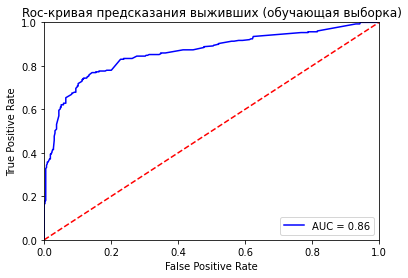

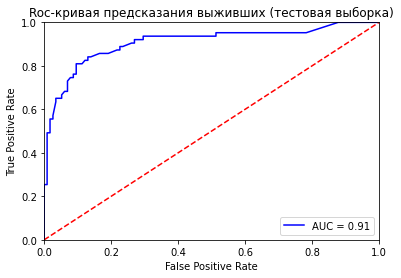

In [32]:
'''
    С помощью predict_proba выдать степень уверенности в ответе (вероятность)
    1 столбец в probs - вероятность неудачи
    2 столбец - вероятность успеха
'''
# ОБУЧАЮЩАЯ ВЫБОРКА
probs = logmodel.predict_proba(X_train) #массив из 2 столбцов
'''
    Берем вероятности успеха модели
'''
preds = probs[:,1] # берем второй столбец из probs
'''
    Определение истинно положительных tpr и ложно положительных результатов fpr по вероятности успеха модели по тестовой 
    эндогенной переменной y_test
'''
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
'''
    Точность - отношение количество истинных положительных результатов, деленное на сумму истинных положительных и ложных 
    положительных результатов.
    TP (True Positive) — кол-во правильно предсказанных выживших;
    FP (False Positive) — кол-во неправильно предсказанных выживших;
    FN (False Negative) — кол-во неправильно предсказанных погибших.
    
    roc_auc - площадь под Roc-кривой = точность модели
'''
roc_auc = metrics.auc(fpr, tpr)

plt.title('Roc-кривая предсказания выживших (обучающая выборка)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
'''
    Офомрление Roc-кривой по обучающей выборке
'''
plt.legend(loc = 'lower right') #вывести легенды внизу справа
plt.plot([0, 1], [0, 1],'r--') # построение y=x
plt.xlim([0, 1]) # минимум и максимум оси x
plt.ylim([0, 1]) # минимум и максимум оси y
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# ТЕСТОВАЯ ВЫБОРКА
probs = logmodel.predict_proba(X_test) #массив из 2 столбцов
'''
    Берем вероятности успеха модели
'''
preds = probs[:,1] # берем второй столбец из probs
'''
    Определение истинно положительных tpr и ложно положительных результатов fpr по вероятности успеха модели по тестовой 
    эндогенной переменной y_test
'''
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
'''
    Точность - отношение количество истинных положительных результатов, деленное на сумму истинных положительных и ложных 
    положительных результатов.
    TP (True Positive) — кол-во правильно предсказанных выживших;
    FP (False Positive) — кол-во неправильно предсказанных выживших;
    FN (False Negative) — кол-во неправильно предсказанных погибших.
    
    roc_auc - площадь под Roc-кривой = точность модели
'''
roc_auc = metrics.auc(fpr, tpr)

plt.title('Roc-кривая предсказания выживших (тестовая выборка)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
'''
    Офомрление графика Roc-кривой по тестовой выборке
'''
plt.legend(loc = 'lower right') #вывести легенды внизу справа
plt.plot([0, 1], [0, 1],'r--') # построение y=x
plt.xlim([0, 1]) # минимум и максимум оси x
plt.ylim([0, 1]) # минимум и максимум оси y
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()